In [650]:
""" ----- EDA -----
"""

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

""" ----- Feature Engineering -----
"""

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer
# Log Transform
# Z-score

""" ----- Feature Selection -----
"""

from sklearn.feature_selection import VarianceThreshold, chi2, SelectKBest, f_regression, mutual_info_classif, RFE, SelectFromModel, r_regression

# Models for SelectFromModel 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

""" ----- Model Selection -----
"""

from sklearn.linear_model import Ridge, Lasso, LinearRegression

# CV for models
from sklearn.linear_model import RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.compose import ColumnTransformer

import statsmodels.api as sm

from sklearn.pipeline import make_pipeline, Pipeline

In [651]:
df = pd.read_csv("data/AmesHousing.csv")

In [652]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [653]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [654]:
df.shape

(2930, 75)

In [655]:
na_ratios = df.isnull().sum() / len(df)
na_ratios = na_ratios.drop(na_ratios[na_ratios == 0].index).sort_values(ascending = False)
na_ratios = pd.DataFrame({"Missing Proportion": na_ratios})
na_ratios = na_ratios.drop(na_ratios[na_ratios["Missing Proportion"] <0.005].index)
na_ratios

,Missing Proportion
Lot Frontage,0.167235
Garage Yr Blt,0.054266
Garage Qual,0.054266
Garage Finish,0.054266
Garage Cond,0.054266
Garage Type,0.053584
Bsmt Exposure,0.028328
BsmtFin Type 2,0.027645
Bsmt Qual,0.027304
Bsmt Cond,0.027304


In [656]:
df.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 75, dtype: object

In [657]:
num_col = list(df.select_dtypes(include=['int64', 'float64']).columns)
df.Neighborhood

0         NAmes
1         NAmes
2         NAmes
3         NAmes
4       Gilbert
         ...   
2925    Mitchel
2926    Mitchel
2927    Mitchel
2928    Mitchel
2929    Mitchel
Name: Neighborhood, Length: 2930, dtype: object

In [658]:
# filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
# plt.figure(figsize=(30,10))
# sns.heatmap(df.corr(), annot=True, cmap="Reds")
# plt.show()

In [659]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

complete_correlation= associations(df,compute_only=True)

# mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(40, 40))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

# plt.savefig("corr_matrice.png")

In [660]:
filteredDf = complete_correlation['corr'][(complete_correlation['corr'] >= .5)]

In [661]:
features = filteredDf['SalePrice'][filteredDf['SalePrice'] > 0].index

In [662]:
features

Index(['Neighborhood', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'SalePrice'],
      dtype='object')

In [663]:
y = df.SalePrice
X = df[features]
pre_proc_df = df[features]
pre_proc_df['SalePrice'] = y

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_16772\3025895732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['SalePrice'] = y


In [664]:
pre_proc_df

,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,Garage Finish,Garage Cars,Garage Area,SalePrice
0,NAmes,6,1960,1960,112.0,TA,CBlock,TA,1080.0,1656,1656,1,TA,Fin,2.0,528.0,215000
1,NAmes,5,1961,1961,0.0,TA,CBlock,TA,882.0,896,896,1,TA,Unf,1.0,730.0,105000
2,NAmes,6,1958,1958,108.0,TA,CBlock,TA,1329.0,1329,1329,1,Gd,Unf,1.0,312.0,172000
3,NAmes,7,1968,1968,0.0,Gd,CBlock,TA,2110.0,2110,2110,2,Ex,Fin,2.0,522.0,244000
4,Gilbert,5,1997,1998,0.0,TA,PConc,Gd,928.0,928,1629,2,TA,Fin,2.0,482.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Mitchel,6,1984,1984,0.0,TA,CBlock,TA,1003.0,1003,1003,1,TA,Unf,2.0,588.0,142500
2926,Mitchel,5,1983,1983,0.0,TA,CBlock,Gd,864.0,902,902,1,TA,Unf,2.0,484.0,131000
2927,Mitchel,5,1992,1992,0.0,TA,PConc,Gd,912.0,970,970,1,TA,NaN,0.0,0.0,132000
2928,Mitchel,5,1974,1975,0.0,TA,CBlock,Gd,1389.0,1389,1389,1,TA,RFn,2.0,418.0,170000


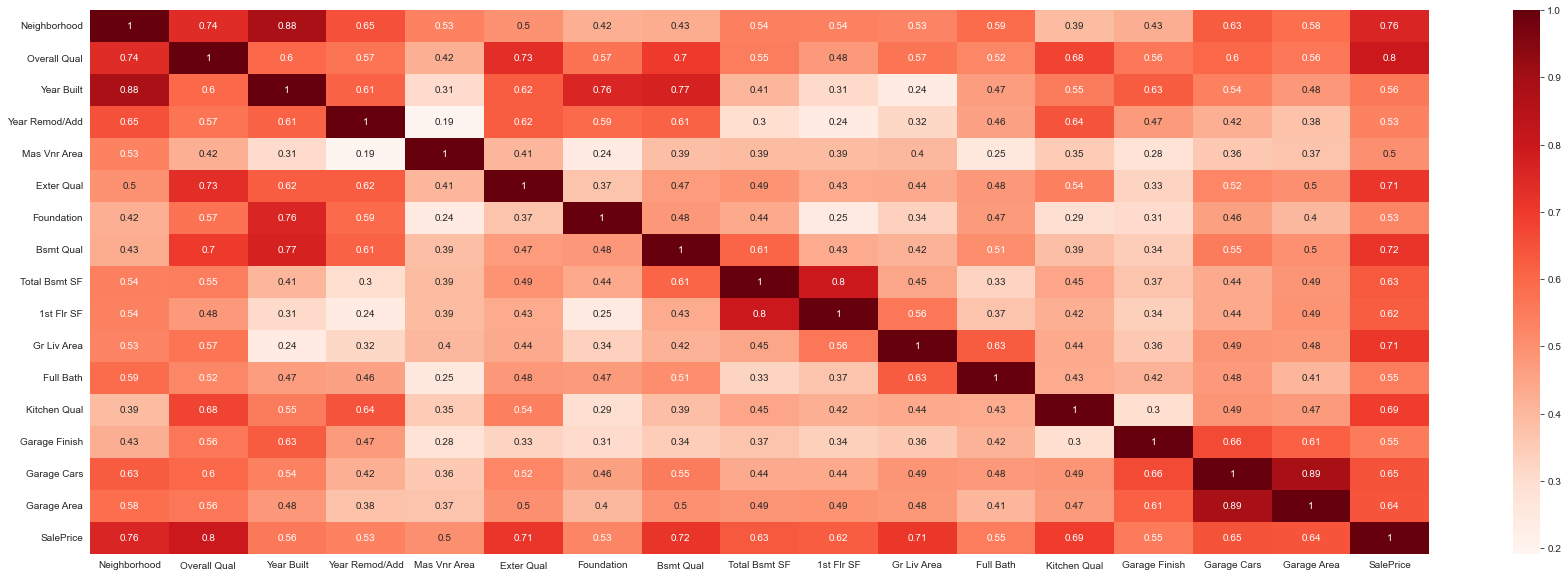

In [665]:
complete_correlation= associations(pre_proc_df ,compute_only=True)

plt.figure(figsize=(30,10))
sns.heatmap(complete_correlation['corr'], annot=True, cmap="Reds")
plt.show()

In [666]:
pre_proc_df = pre_proc_df.drop(['Exter Qual', 'Foundation', 'Year Remod/Add', 'Full Bath', 'Garage Area', 'Year Built'], axis = 1)
pre_proc_df

,Neighborhood,Overall Qual,Mas Vnr Area,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Kitchen Qual,Garage Finish,Garage Cars,SalePrice
0,NAmes,6,112.0,TA,1080.0,1656,1656,TA,Fin,2.0,215000
1,NAmes,5,0.0,TA,882.0,896,896,TA,Unf,1.0,105000
2,NAmes,6,108.0,TA,1329.0,1329,1329,Gd,Unf,1.0,172000
3,NAmes,7,0.0,TA,2110.0,2110,2110,Ex,Fin,2.0,244000
4,Gilbert,5,0.0,Gd,928.0,928,1629,TA,Fin,2.0,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,Mitchel,6,0.0,TA,1003.0,1003,1003,TA,Unf,2.0,142500
2926,Mitchel,5,0.0,Gd,864.0,902,902,TA,Unf,2.0,131000
2927,Mitchel,5,0.0,Gd,912.0,970,970,TA,NaN,0.0,132000
2928,Mitchel,5,0.0,Gd,1389.0,1389,1389,TA,RFn,2.0,170000


In [667]:
pre_proc_df.isnull().sum()

Neighborhood       0
Overall Qual       0
Mas Vnr Area      23
Bsmt Qual         80
Total Bsmt SF      1
1st Flr SF         0
Gr Liv Area        0
Kitchen Qual       0
Garage Finish    159
Garage Cars        1
SalePrice          0
dtype: int64

In [668]:
pre_proc_df['Mas Vnr Area'][pre_proc_df['Mas Vnr Area'].isnull()] = 0.0

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_16772\580742264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Mas Vnr Area'][pre_proc_df['Mas Vnr Area'].isnull()] = 0.0


array([[<AxesSubplot:title={'center':'Mas Vnr Area'}>]], dtype=object)

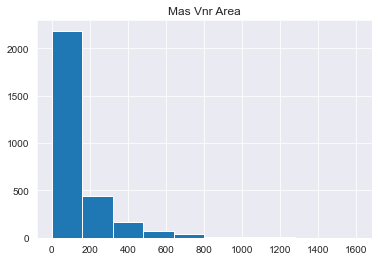

In [669]:
pre_proc_df.hist(column='Mas Vnr Area')

In [670]:
pre_proc_df['Garage Finish'][pre_proc_df['Garage Finish'].isnull()] = 'Nothing'

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_16772\2717529298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Garage Finish'][pre_proc_df['Garage Finish'].isnull()] = 'Nothing'


In [671]:
pre_proc_df['Garage Finish']

0           Fin
1           Unf
2           Unf
3           Fin
4           Fin
         ...   
2925        Unf
2926        Unf
2927    Nothing
2928        RFn
2929        Fin
Name: Garage Finish, Length: 2930, dtype: object

In [672]:
pre_proc_df['Garage Cars'][pre_proc_df['Garage Cars'].isnull()] = 0.0

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_16772\1963821008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proc_df['Garage Cars'][pre_proc_df['Garage Cars'].isnull()] = 0.0


In [673]:
# input value related to the price in bsmt qual
pre_proc_df.isnull().sum()

Neighborhood      0
Overall Qual      0
Mas Vnr Area      0
Bsmt Qual        80
Total Bsmt SF     1
1st Flr SF        0
Gr Liv Area       0
Kitchen Qual      0
Garage Finish     0
Garage Cars       0
SalePrice         0
dtype: int64

In [674]:
pre_proc_df = pre_proc_df.dropna()

In [675]:
y = pre_proc_df['SalePrice']
X = pre_proc_df.drop(['SalePrice'], axis=1)

In [676]:
num_cols = ['Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Overall Qual', 'Mas Vnr Area']

ord_cols = ['Bsmt Qual', 'Kitchen Qual']

ohe_cols = ['Neighborhood']

num_pipeline = Pipeline([
  ('scaler', StandardScaler())
])

pipeline = ColumnTransformer(
  transformers=[
     ('ord_encoder', OrdinalEncoder(), ord_cols),
     ('ohe_encoder', OneHotEncoder(), ohe_cols),
     ('num_imputer', num_pipeline, num_cols)
])

X_prep = pipeline.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

In [703]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

ValueError: could not convert string to float: 'NAmes'

In [701]:
skb

SelectKBest(score_func=array([[ 0.        ,  4.        ,  0.        , ...,  0.2946604 ,
        -0.10622977,  1.78644381],
       [ 4.        ,  2.        ,  0.        , ...,  0.2946604 ,
        -0.83052369,  0.63156916],
       [ 2.        ,  2.        ,  0.        , ...,  0.2946604 ,
         0.61806414, -0.57327604],
       ...,
       [ 2.        ,  2.        ,  0.        , ...,  0.2946604 ,
         0.61806414, -0.57327604],
       [ 4.        ,  2.        ,  0.        , ..., -2.35032272,
        -0.83052369, -0.57327604],
       [ 2.        ,  2.        ,  0.        , ...,  0.2946604 ,
        -0.10622977, -0.57327604]]))

In [677]:
X_train

array([[ 0.        ,  4.        ,  0.        , ...,  0.2946604 ,
        -0.10622977,  1.78644381],
       [ 4.        ,  2.        ,  0.        , ...,  0.2946604 ,
        -0.83052369,  0.63156916],
       [ 2.        ,  2.        ,  0.        , ...,  0.2946604 ,
         0.61806414, -0.57327604],
       ...,
       [ 2.        ,  2.        ,  0.        , ...,  0.2946604 ,
         0.61806414, -0.57327604],
       [ 4.        ,  2.        ,  0.        , ..., -2.35032272,
        -0.83052369, -0.57327604],
       [ 2.        ,  2.        ,  0.        , ...,  0.2946604 ,
        -0.10622977, -0.57327604]])

In [681]:
statmod = sm.OLS(y_train, X_train).fit()
print(statmod.summary())

""" REDUCE MULTICOLINEARITY """

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     343.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:14:18   Log-Likelihood:                -26941.
No. Observations:                2280   AIC:                         5.395e+04
Df Residuals:                    2246   BIC:                         5.414e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5594.6086    777.618     -7.195      0.0

In [693]:
lassocv = LassoLarsCV(cv=5, normalize=False)
ridgecv = RidgeCV()
lr = LinearRegression()

# lasso_pipeline = Pipeline([('ord_enc', OrdinalEncoder()) , ('lasso', Lasso(alpha=1.0))])
# ridge_pipeline = Pipeline([('ord_enc', OrdinalEncoder()) , ('ridge', Ridge(alpha=1.0))])
# lr_pipeline = Pipeline([('ord_enc', OrdinalEncoder()) , ('lr', LinearRegression())])

lassocv.fit(X_train, y_train)
ridgecv.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [694]:

print(lr.score(X_train, y_train))
print(ridgecv.score(X_train, y_train))
print(lassocv.score(X_train, y_train))

lr_pred  = lr.predict(X_test)
ridge_pred  = ridgecv.predict(X_test)
lasso_pred  = lassocv.predict(X_test)

print('MAE on test data with lr: ',  mean_absolute_error(y_test, lr_pred))
print('MAE on test data with ridge: ',  mean_absolute_error(y_test, ridge_pred))
print('MAE on test data with lasso: ',  mean_absolute_error(y_test, lasso_pred))


0.8345571955240217
0.834530625831515
0.8345268555474166
MAE on test data with lr:  21200.170487360912
MAE on test data with ridge:  21193.073572516892
MAE on test data with lasso:  21203.050233387403
